In [1]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
secrets_file = open("/Users/erinberardi/Erin_dataV2-labs/SpotifySecret.txt","r")

In [3]:
string = secrets_file.read()

In [4]:
secrets_dict={}
for line in string.split('\n'):
    if len(line)>0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [5]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],client_secret=secrets_dict['cs']))

In [6]:
top_300 = pd.read_csv('/Users/erinberardi/Erin_dataV2-labs/6.01 Web scraping single page/top_100_lists.csv')

In [7]:
top_300

,song,artist
0,We Don't Talk About Bruno,"Carolina Gaitan, Mauro Castillo, Adassa, Rhenz..."
1,Heat Waves,Glass Animals
2,Easy On Me,Adele
3,abcdefu,GAYLE
4,Stay,The Kid LAROI & Justin Bieber
...,...,...
295,Things A Man Oughta Know,Lainey Wilson
296,Throat Baby (Go Baby),BRS Kash
297,Tombstone,Rod Wave
298,Drinkin' Beer. Talkin' God. Amen.,Chase Rice Featuring Florida Georgia Line


In [90]:
top_300.to_csv('top_300.csv', index = False)

## Import songs with features 

In [8]:
from time import sleep
from random import randint

playlists = {'top2000':'37i9dQZF1DWTmvXBN4DgpA','All 80s':'1y2WMKnxWDualAaqRgHOXf','All 90s':'37i9dQZF1DXbTxeAdrVG2l','rock top 500':'06ye9lYBlxKIAiueSO7BVy','2000-2021':'5rA2OHJUxeIqwRVrVZ2Wa0','country':'37i9dQZF1DWZBCPUIUs2iR','dance':'06S64oWn7uGnfGrwjh5IWb','All 00s':'0098gmqDhZTMCeGxXUBghm','most popular':'4o8NBsWreC3OnKePUYw0dg','Dutch hits':'78ZjgERKMglgYbqgJQZUFP'}
    
def all_tracks_playlist(id):
    results = sp.user_playlist_tracks("Spotify",id)
    tracks = results['items']
    while results['next'] != None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,2))
    return tracks

playlists_full =[]

for key in playlists.keys():
    playlists_full= playlists_full + (all_tracks_playlist(playlists[key]))

In [9]:
#playlists_full

In [10]:
len(playlists_full)

10143

In [11]:
audio1 = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')
audio2 = pd.read_csv('SpotifyAudioFeaturesNov2018.csv')

In [12]:
all_audio = pd.concat([audio1, audio2], axis = 0)
all_audio

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.0000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.0000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.0000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.9120,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.8780,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116367,Roma Atmosphere,5R9ukMX7BDIy1WJYsAhBD6,Sette Oche,0.978000,0.103,245714,0.086,0.9630,9,0.0987,-20.715,0,0.0399,57.545,4,0.037,55
116368,Philthy Rich,6LlTJUQPhqvZuvOmgkLGYh,"Off Safety (feat. Yhung T.O., Mozzy & Ziggy)",0.099200,0.674,221934,0.628,0.0000,9,0.3740,-8.277,0,0.1890,93.053,4,0.613,46
116369,Nef The Pharaoh,0B2LhMYcGR9Gmi6BQLdzlO,Ludacris,0.027700,0.792,183771,0.747,0.0000,11,0.1170,-8.753,0,0.3420,94.498,4,0.584,47
116370,The Ting Tings,0yzA9b21pJgnlLQDirsxAm,Estranged,0.067500,0.548,311267,0.506,0.0244,10,0.1050,-8.251,1,0.0286,163.967,4,0.271,50


In [13]:
song = [playlists_full[i]['track']['name'] for i in range(len(playlists_full))]


In [14]:
artist = [playlists_full[i]['track']['artists'][0]['name'] for i in range(len(playlists_full))]

In [15]:
url = [playlists_full[i]['track']['external_urls']['spotify'] for i in range(len(playlists_full))]

In [16]:
song_uri = [playlists_full[i]["track"]["uri"] for i in range(len(playlists_full))]

In [17]:
song_features = [sp.audio_features(i) for i in song_uri]

In [18]:
song_features_df = pd.DataFrame(song_features)

In [19]:
song_features_df

,0
0,"{'danceability': 0.392, 'energy': 0.402, 'key'..."
1,"{'danceability': 0.401, 'energy': 0.383, 'key'..."
2,"{'danceability': 0.579, 'energy': 0.508, 'key'..."
3,"{'danceability': 0.334, 'energy': 0.472, 'key'..."
4,"{'danceability': 0.209, 'energy': 0.417, 'key'..."
...,...
10138,"{'danceability': 0.24, 'energy': 0.506, 'key':..."
10139,"{'danceability': 0.714, 'energy': 0.902, 'key'..."
10140,"{'danceability': 0.468, 'energy': 0.55, 'key':..."
10141,"{'danceability': 0.599, 'energy': 0.356, 'key'..."


In [20]:
song_features_df = song_features_df.rename(columns= {0:'features'})

In [21]:
song_features_df['features'][0]

{'danceability': 0.392,
 'energy': 0.402,
 'key': 0,
 'loudness': -9.961,
 'mode': 0,
 'speechiness': 0.0536,
 'acousticness': 0.288,
 'instrumentalness': 0,
 'liveness': 0.243,
 'valence': 0.228,
 'tempo': 143.883,
 'type': 'audio_features',
 'id': '7tFiyTwD0nx5a1eklYtX2J',
 'uri': 'spotify:track:7tFiyTwD0nx5a1eklYtX2J',
 'track_href': 'https://api.spotify.com/v1/tracks/7tFiyTwD0nx5a1eklYtX2J',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7tFiyTwD0nx5a1eklYtX2J',
 'duration_ms': 354320,
 'time_signature': 4}

In [22]:
danceability = [song_features_df['features'][i]['danceability'] for i in range(len(song_features_df))]
energy = [song_features_df['features'][i]['energy'] for i in range(len(song_features_df))]
key = [song_features_df['features'][i]['key'] for i in range(len(song_features_df))]
loudness = [song_features_df['features'][i]['loudness'] for i in range(len(song_features_df))]
mode = [song_features_df['features'][i]['mode'] for i in range(len(song_features_df))]
speechiness = [song_features_df['features'][i]['speechiness'] for i in range(len(song_features_df))]
acousticness = [song_features_df['features'][i]['acousticness'] for i in range(len(song_features_df))]
instrumentalness = [song_features_df['features'][i]['instrumentalness'] for i in range(len(song_features_df))]
liveness = [song_features_df['features'][i]['liveness'] for i in range(len(song_features_df))]
valence = [song_features_df['features'][i]['valence'] for i in range(len(song_features_df))]
tempo = [song_features_df['features'][i]['tempo'] for i in range(len(song_features_df))]
duration_ms = [song_features_df['features'][i]['duration_ms'] for i in range(len(song_features_df))]
uri = [song_features_df['features'][i]['id'] for i in range(len(song_features_df))]


In [23]:
df_song_feature = pd.DataFrame({'song_title':song,'artists':artist,'uri':uri,'danceability':danceability,'energy':energy,'key':key,'loudness':loudness,'mode':mode,'speechiness':speechiness,'acousticness':acousticness,'instrumentalness':instrumentalness,'liveness':liveness,'valence':valence,'tempo':tempo,'duration_ms':duration_ms,'url':url})


In [24]:
df_song_feature.head()

,song_title,artists,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url
0,Bohemian Rhapsody - Remastered 2011,Queen,7tFiyTwD0nx5a1eklYtX2J,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,354320,https://open.spotify.com/track/7tFiyTwD0nx5a1e...
1,Roller Coaster,Danny Vera,5B5YKjgne3TZzNpMsN9aj1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,269986,https://open.spotify.com/track/5B5YKjgne3TZzNp...
2,Hotel California - 2013 Remaster,Eagles,40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,391376,https://open.spotify.com/track/40riOy7x9W7GXjy...
3,Piano Man,Billy Joel,3FCto7hnn1shUyZL42YgfO,0.334,0.472,0,-8.791,1,0.0277,0.60000,0.000004,0.3170,0.431,179.173,336093,https://open.spotify.com/track/3FCto7hnn1shUyZ...
4,Fix You,Coldplay,7LVHVU3tWfcxj5aiPFEW4Q,0.209,0.417,3,-8.740,1,0.0338,0.16400,0.001960,0.1130,0.124,138.178,295533,https://open.spotify.com/track/7LVHVU3tWfcxj5a...


In [25]:
df_song_feature=df_song_feature.drop(['url'], axis=1)

In [27]:
df_song_feature.to_csv('spotify_features.csv', index = False)

# Putting all data together

In [29]:
song_features = pd.read_csv('spotify_features.csv')

In [30]:
cols = song_features.columns
cols

Index(['song_title', 'artists', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [31]:
all_audio.columns

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')

In [32]:
all_audio.rename(columns = {'artist_name':'artists','track_name':'song_title','track_id':'uri'}, inplace = True)
#df. rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)

In [33]:
all_audio = all_audio.drop(['time_signature','popularity'], axis = 1)

In [34]:
all_audio = all_audio[cols]

In [35]:
all_audio.columns

Index(['song_title', 'artists', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [36]:
full_audio_songs = pd.concat([song_features, all_audio],axis = 0)

In [37]:
full_audio_songs

,song_title,artists,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Bohemian Rhapsody - Remastered 2011,Queen,7tFiyTwD0nx5a1eklYtX2J,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,354320
1,Roller Coaster,Danny Vera,5B5YKjgne3TZzNpMsN9aj1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,269986
2,Hotel California - 2013 Remaster,Eagles,40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,391376
3,Piano Man,Billy Joel,3FCto7hnn1shUyZL42YgfO,0.334,0.472,0,-8.791,1,0.0277,0.60000,0.000004,0.3170,0.431,179.173,336093
4,Fix You,Coldplay,7LVHVU3tWfcxj5aiPFEW4Q,0.209,0.417,3,-8.740,1,0.0338,0.16400,0.001960,0.1130,0.124,138.178,295533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116367,Sette Oche,Roma Atmosphere,5R9ukMX7BDIy1WJYsAhBD6,0.103,0.086,9,-20.715,0,0.0399,0.97800,0.963000,0.0987,0.037,57.545,245714
116368,"Off Safety (feat. Yhung T.O., Mozzy & Ziggy)",Philthy Rich,6LlTJUQPhqvZuvOmgkLGYh,0.674,0.628,9,-8.277,0,0.1890,0.09920,0.000000,0.3740,0.613,93.053,221934
116369,Ludacris,Nef The Pharaoh,0B2LhMYcGR9Gmi6BQLdzlO,0.792,0.747,11,-8.753,0,0.3420,0.02770,0.000000,0.1170,0.584,94.498,183771
116370,Estranged,The Ting Tings,0yzA9b21pJgnlLQDirsxAm,0.548,0.506,10,-8.251,1,0.0286,0.06750,0.024400,0.1050,0.271,163.967,311267


In [38]:
full_audio_songs['song_and_artist'] = full_audio_songs['song_title'] + ' - ' + full_audio_songs['artists']

In [39]:
full_audio_songs

,song_title,artists,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_and_artist
0,Bohemian Rhapsody - Remastered 2011,Queen,7tFiyTwD0nx5a1eklYtX2J,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,354320,Bohemian Rhapsody - Remastered 2011 - Queen
1,Roller Coaster,Danny Vera,5B5YKjgne3TZzNpMsN9aj1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,269986,Roller Coaster - Danny Vera
2,Hotel California - 2013 Remaster,Eagles,40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,391376,Hotel California - 2013 Remaster - Eagles
3,Piano Man,Billy Joel,3FCto7hnn1shUyZL42YgfO,0.334,0.472,0,-8.791,1,0.0277,0.60000,0.000004,0.3170,0.431,179.173,336093,Piano Man - Billy Joel
4,Fix You,Coldplay,7LVHVU3tWfcxj5aiPFEW4Q,0.209,0.417,3,-8.740,1,0.0338,0.16400,0.001960,0.1130,0.124,138.178,295533,Fix You - Coldplay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116367,Sette Oche,Roma Atmosphere,5R9ukMX7BDIy1WJYsAhBD6,0.103,0.086,9,-20.715,0,0.0399,0.97800,0.963000,0.0987,0.037,57.545,245714,Sette Oche - Roma Atmosphere
116368,"Off Safety (feat. Yhung T.O., Mozzy & Ziggy)",Philthy Rich,6LlTJUQPhqvZuvOmgkLGYh,0.674,0.628,9,-8.277,0,0.1890,0.09920,0.000000,0.3740,0.613,93.053,221934,"Off Safety (feat. Yhung T.O., Mozzy & Ziggy) -..."
116369,Ludacris,Nef The Pharaoh,0B2LhMYcGR9Gmi6BQLdzlO,0.792,0.747,11,-8.753,0,0.3420,0.02770,0.000000,0.1170,0.584,94.498,183771,Ludacris - Nef The Pharaoh
116370,Estranged,The Ting Tings,0yzA9b21pJgnlLQDirsxAm,0.548,0.506,10,-8.251,1,0.0286,0.06750,0.024400,0.1050,0.271,163.967,311267,Estranged - The Ting Tings


In [40]:
full_audio_songs['song_title'] = full_audio_songs['song_title'].str.lower()

In [83]:
full_audio_songs.to_csv('full_audio_songs.csv', index=False)

In [42]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans


In [43]:
full_audio_songs

,song_title,artists,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_and_artist
0,bohemian rhapsody - remastered 2011,Queen,7tFiyTwD0nx5a1eklYtX2J,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,354320,Bohemian Rhapsody - Remastered 2011 - Queen
1,roller coaster,Danny Vera,5B5YKjgne3TZzNpMsN9aj1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,269986,Roller Coaster - Danny Vera
2,hotel california - 2013 remaster,Eagles,40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,391376,Hotel California - 2013 Remaster - Eagles
3,piano man,Billy Joel,3FCto7hnn1shUyZL42YgfO,0.334,0.472,0,-8.791,1,0.0277,0.60000,0.000004,0.3170,0.431,179.173,336093,Piano Man - Billy Joel
4,fix you,Coldplay,7LVHVU3tWfcxj5aiPFEW4Q,0.209,0.417,3,-8.740,1,0.0338,0.16400,0.001960,0.1130,0.124,138.178,295533,Fix You - Coldplay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116367,sette oche,Roma Atmosphere,5R9ukMX7BDIy1WJYsAhBD6,0.103,0.086,9,-20.715,0,0.0399,0.97800,0.963000,0.0987,0.037,57.545,245714,Sette Oche - Roma Atmosphere
116368,"off safety (feat. yhung t.o., mozzy & ziggy)",Philthy Rich,6LlTJUQPhqvZuvOmgkLGYh,0.674,0.628,9,-8.277,0,0.1890,0.09920,0.000000,0.3740,0.613,93.053,221934,"Off Safety (feat. Yhung T.O., Mozzy & Ziggy) -..."
116369,ludacris,Nef The Pharaoh,0B2LhMYcGR9Gmi6BQLdzlO,0.792,0.747,11,-8.753,0,0.3420,0.02770,0.000000,0.1170,0.584,94.498,183771,Ludacris - Nef The Pharaoh
116370,estranged,The Ting Tings,0yzA9b21pJgnlLQDirsxAm,0.548,0.506,10,-8.251,1,0.0286,0.06750,0.024400,0.1050,0.271,163.967,311267,Estranged - The Ting Tings


In [44]:
cluster_features = full_audio_songs.drop(['song_title','artists','uri','song_and_artist'],axis=1)

In [67]:
cluster_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,354320
1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,269986
2,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,391376
3,0.334,0.472,0,-8.791,1,0.0277,0.60000,0.000004,0.3170,0.431,179.173,336093
4,0.209,0.417,3,-8.740,1,0.0338,0.16400,0.001960,0.1130,0.124,138.178,295533
...,...,...,...,...,...,...,...,...,...,...,...,...
116367,0.103,0.086,9,-20.715,0,0.0399,0.97800,0.963000,0.0987,0.037,57.545,245714
116368,0.674,0.628,9,-8.277,0,0.1890,0.09920,0.000000,0.3740,0.613,93.053,221934
116369,0.792,0.747,11,-8.753,0,0.3420,0.02770,0.000000,0.1170,0.584,94.498,183771
116370,0.548,0.506,10,-8.251,1,0.0286,0.06750,0.024400,0.1050,0.271,163.967,311267


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(cluster_features)
standard_cluster = scaler.transform(cluster_features)

standard_cluster = pd.DataFrame(standard_cluster,columns=cluster_features.columns)

In [52]:
standard_cluster.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [46]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

<IPython.core.display.Javascript object>

In [47]:
standard_cluster.to_csv('std_features.csv')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

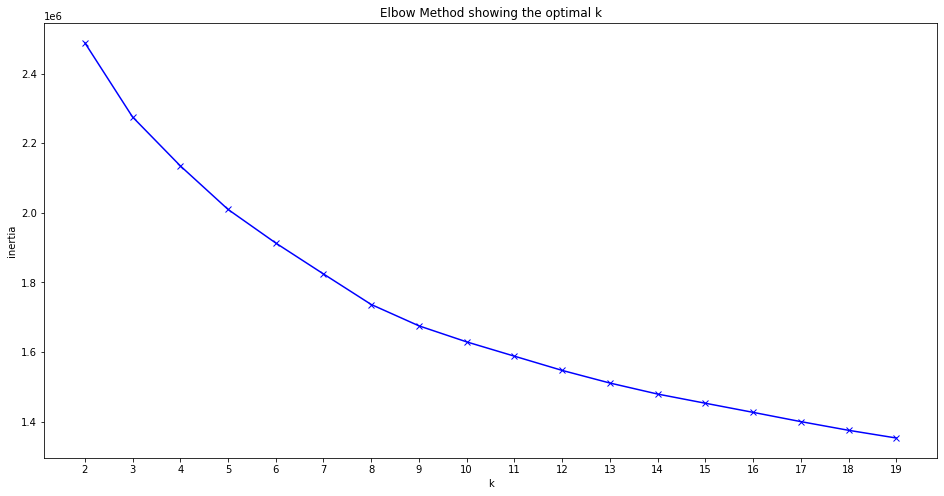

In [48]:
import numpy as np
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(standard_cluster)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [ ]:
# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters)
#     preds = clusterer.fit_predict(df)
#     centers = clusterer.cluster_centers_

#     score = silhouette_score(df, preds)
#     print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

### Silhouette Score

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

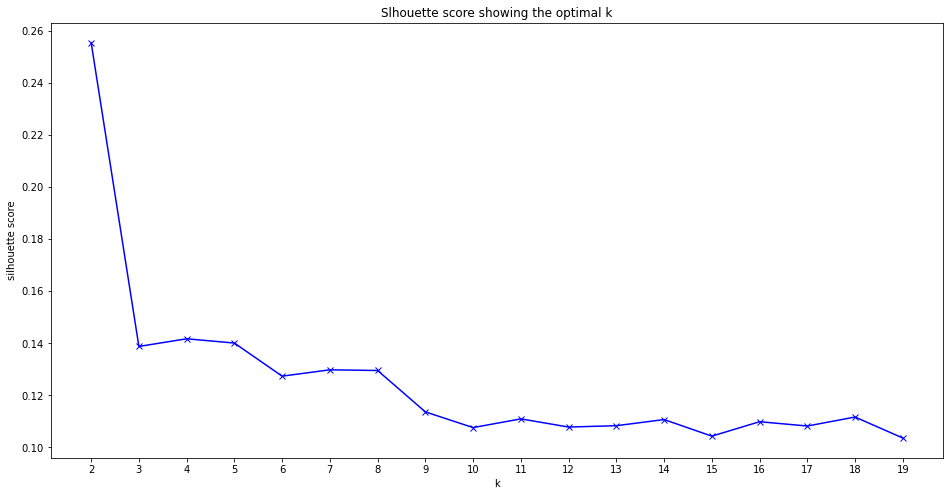

In [53]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(standard_cluster)
    silhouette.append(silhouette_score(standard_cluster, kmeans.predict(standard_cluster)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=17, random_state=1234).fit(standard_cluster)
clusters = kmeans.predict(standard_cluster)
pd.Series(clusters).value_counts().sort_index()

0     24285
1     23329
2     20396
3     24257
4     12125
5     13444
6     14894
7     14390
8     16214
9     18237
10    23549
11      177
12    12697
13     4537
14     3155
15    16164
16    15328
dtype: int64

In [72]:
full_audio_songs['cluster']=clusters

In [86]:
list_with_cluster=full_audio_songs[['song_and_artist', 'cluster']]
list_with_cluster

,song_and_artist,cluster
0,Bohemian Rhapsody - Remastered 2011 - Queen,0
1,Roller Coaster - Danny Vera,1
2,Hotel California - 2013 Remaster - Eagles,9
3,Piano Man - Billy Joel,8
4,Fix You - Coldplay,2
...,...,...
116367,Sette Oche - Roma Atmosphere,15
116368,"Off Safety (feat. Yhung T.O., Mozzy & Ziggy) -...",10
116369,Ludacris - Nef The Pharaoh,6
116370,Estranged - The Ting Tings,8


## Saving needed things for other notebook

In [89]:
list_with_cluster.to_csv('list_with_cluster.csv',index=False)

In [73]:
import pickle
pickle.dump(kmeans, open('kmean.pkl', 'wb'))

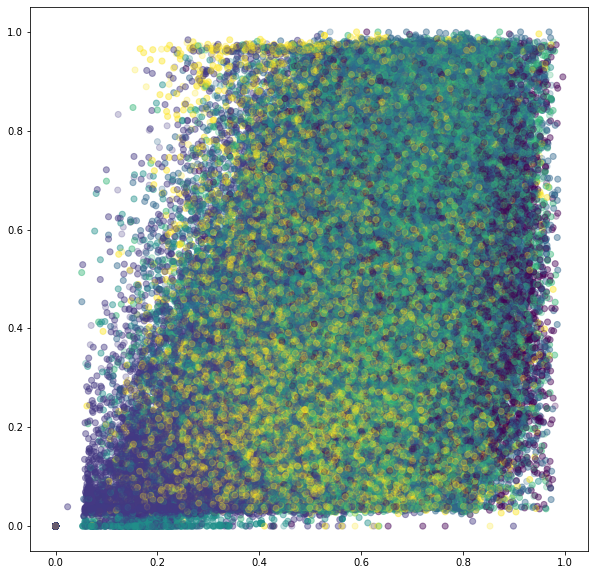

In [56]:
plt.figure(figsize=(10, 10))
plt.scatter(cluster_features['danceability'], cluster_features['valence'], c=clusters,alpha=0.25)
plt.show()

In [58]:
#first part of the pipeline
import random 
new_song = input("Enter song: ")
#new_artist = input("Enter artist: ")

if new_song in list(top_300['song']):
    print(random.choice(list(top_300['song'])))
else:
    print('No Recommendation')

Enter song: kdfgfjg
No Recommendation


### Connecting to Spotify

In [74]:
secrets_file = open("/Users/erinberardi/Erin_dataV2-labs/SpotifySecret.txt","r")

In [75]:
string = secrets_file.read()

In [76]:
secrets_dict={}
for line in string.split('\n'):
    if len(line)>0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [77]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],client_secret=secrets_dict['cs']))


# function to get features from 1 new song

In [78]:
def features(track, artist):
    track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')
    uri = track_id["tracks"]["items"][0]['id']
    features = sp.audio_features(uri)
    return features

In [79]:
features("why can't i be you", 'the cure')

[{'danceability': 0.629,
  'energy': 0.949,
  'key': 0,
  'loudness': -4.664,
  'mode': 0,
  'speechiness': 0.048,
  'acousticness': 0.461,
  'instrumentalness': 8.56e-06,
  'liveness': 0.0522,
  'valence': 0.719,
  'tempo': 107.798,
  'type': 'audio_features',
  'id': '3RcrFgETR1QGjzV6ZzIRBy',
  'uri': 'spotify:track:3RcrFgETR1QGjzV6ZzIRBy',
  'track_href': 'https://api.spotify.com/v1/tracks/3RcrFgETR1QGjzV6ZzIRBy',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3RcrFgETR1QGjzV6ZzIRBy',
  'duration_ms': 194133,
  'time_signature': 4}]

In [82]:
new_song = input("Enter song: ").lower()
new_artist = input("Enter artist: ").lower()
print('\n')
#check if in top 300
if new_song in list(top_300['song']):
    recommendation_hot = random.choice(list(top300['song']))
    while recommendation_hot == new_song:
            recommendation_hot = random.choice(list(top300['song']))
            print('Your recommendation: \n', recommendation_hot)
#get spotify features
else:
    feature = features(new_song, new_artist)
    column = list(feature[0].keys())
    values = [list(feature[0].values())]
    df_new_song = pd.DataFrame(data = feature, columns = column)
    df_new_song = df_new_song.drop(['type','id','uri','track_href','analysis_url','time_signature'],axis=1)
    std_new_song = scaler.transform(df_new_song)
    new_cluster = kmeans.predict(std_new_song)
    df_cluster = full_audio_songs[full_audio_songs['cluster'] == list(new_cluster)[0]]

    print('Your recommendation: \n',random.choice(list(full_audio_songs['song_and_artist'])))



Enter song: flowers
Enter artist: Miley cyrus
Your recommendation: 
 Bounce That - KYD
